In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

Read the datasets below

In [2]:
df_train = pd.read_excel("train.xlsx")
df_test = pd.read_excel("test.xlsx")
df_val=pd.read_excel('validate.xlsx')

In [3]:
#Reading locations.txt

f = open('locations.txt','r')
loc = f.read()
loc = loc.replace('"','')
loc = loc.strip('][\n').split(",")

In [4]:
#Reading pincodes.txt

f = open('pincodes.txt','r')
pin= f.read()
pin = pin.replace('"','')
pin = pin.strip('][').split(",")
pin = list(map(int,pin))

In [5]:
#Mapping location to pincode and adding pincode column to dataset

l_p=dict(zip(loc,pin))
df_train['Pincode']=df_train['Location'].map(l_p)
df_test['Pincode']=df_test['Location'].map(l_p)
df_val['Pincode']=df_val['Location'].map(l_p)

EDA, Data Cleaning, Data processing (Imputation, categorical variables, variable encoding, feature engineering etc)

In [6]:
df_train.head()

,Bedrooms,Bathrooms,Facing,Furnishing,Tennants,Area,Price,Locality,Location,Pincode
0,3 BHK Apartment,2,2,Furnished,Bachelors/Family,1800 sqft,35000,"Khairatabad, NH",Khairatabad,500004.0
1,3 BHK Apartment,2,2,Unfurnished,Bachelors,1495 sqft,23000,"SMR Vinay City, Miyapur, NH",Miyapur,500050.0
2,3 BHK Builder Floor,2,Main Road,Semi-Furnished,Bachelors/Family,1800 sqft,16000,"Old Malakpet, NH",Dilshuknagar,500068.0
3,3 BHK Apartment,2,Immediately,Semi-Furnished,Bachelors/Family,1200 sqft,20000,Brindavan Colony-Toli Chowki,Mehdipatnam,500028.0
4,2 BHK Apartment,2,2,Furnished,Bachelors/Family,1050 sqft,28000,Police Colony-Kondapur,Kondapur,500032.0


In [7]:
df_train.isnull().sum()

Bedrooms       0
Bathrooms      0
Facing         0
Furnishing     0
Tennants       0
Area          40
Price          0
Locality       0
Location       3
Pincode       11
dtype: int64

In [8]:
df_test.isnull().sum()

Bedrooms      0
Bathrooms     5
Facing        5
Furnishing    0
Tennants      1
Area          6
Price         0
Locality      0
Location      0
Pincode       2
dtype: int64

In [9]:
#Cleaning Bedrooms column

def clean_bed(val):
  val =  re.sub("BHK Apartment", '', val)
  val =  re.sub("BHK Builder Floor", '', val)
  val =  re.sub("BHK Penthouse", '', val)
  val =  re.sub("BHK Service Apartment", '', val)
  val =  re.sub("BHK Builderfloor", '', val)
  val =  re.sub("BHK Builder floor", '', val)
  val =  re.sub("Studio Apartment", '1', val)
  val =  re.sub("bedroom 1", '', val)
  val =  re.sub("Apartment", '1', val)
    
  return val
  
df_train['Bedrooms'] = df_train['Bedrooms'].apply(clean_bed)
df_test['Bedrooms'] = df_test['Bedrooms'].apply(clean_bed)  

In [10]:
df_train.head()

,Bedrooms,Bathrooms,Facing,Furnishing,Tennants,Area,Price,Locality,Location,Pincode
0,3,2,2,Furnished,Bachelors/Family,1800 sqft,35000,"Khairatabad, NH",Khairatabad,500004.0
1,3,2,2,Unfurnished,Bachelors,1495 sqft,23000,"SMR Vinay City, Miyapur, NH",Miyapur,500050.0
2,3,2,Main Road,Semi-Furnished,Bachelors/Family,1800 sqft,16000,"Old Malakpet, NH",Dilshuknagar,500068.0
3,3,2,Immediately,Semi-Furnished,Bachelors/Family,1200 sqft,20000,Brindavan Colony-Toli Chowki,Mehdipatnam,500028.0
4,2,2,2,Furnished,Bachelors/Family,1050 sqft,28000,Police Colony-Kondapur,Kondapur,500032.0


In [11]:
#Cleaning Bathrooms column

def clean_bath(val):
  if type(val) is int:
    val = int(val)
    return val
  return None
df_train['Bathrooms'] = df_train['Bathrooms'].apply(clean_bath)
df_test['Bathrooms'] = df_test['Bathrooms'].apply(clean_bath)

In [12]:
df_train.head()

,Bedrooms,Bathrooms,Facing,Furnishing,Tennants,Area,Price,Locality,Location,Pincode
0,3,2.0,2,Furnished,Bachelors/Family,1800 sqft,35000,"Khairatabad, NH",Khairatabad,500004.0
1,3,2.0,2,Unfurnished,Bachelors,1495 sqft,23000,"SMR Vinay City, Miyapur, NH",Miyapur,500050.0
2,3,2.0,Main Road,Semi-Furnished,Bachelors/Family,1800 sqft,16000,"Old Malakpet, NH",Dilshuknagar,500068.0
3,3,2.0,Immediately,Semi-Furnished,Bachelors/Family,1200 sqft,20000,Brindavan Colony-Toli Chowki,Mehdipatnam,500028.0
4,2,2.0,2,Furnished,Bachelors/Family,1050 sqft,28000,Police Colony-Kondapur,Kondapur,500032.0


/Users/agnik/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bathrooms', ylabel='Density'>

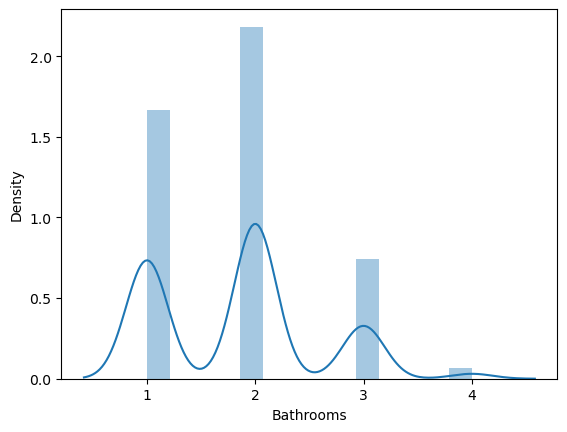

In [13]:
sns.distplot(df_train['Bathrooms'])

In [14]:
def clean_facing(val):
  if val in ['North','East','West','South','Main Road','North - East','North - West','South - West','South - East']:
    return val
  return None
df_train['Facing']=df_train['Facing'].apply(clean_facing)
df_test['Facing']=df_test['Facing'].apply(clean_facing)
df_val['Facing']=df_val['Facing'].apply(lambda x:x.capitalize())
df_val['Facing']=df_val['Facing'].apply(clean_facing)

In [15]:
df_train['Facing'].fillna(df_train['Facing'].mode()[0],inplace=True)
df_test['Facing'].fillna(df_test['Facing'].mode()[0],inplace=True)
df_val['Facing'].fillna(df_val['Facing'].mode()[0],inplace=True)

/Users/agnik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Facing', ylabel='count'>

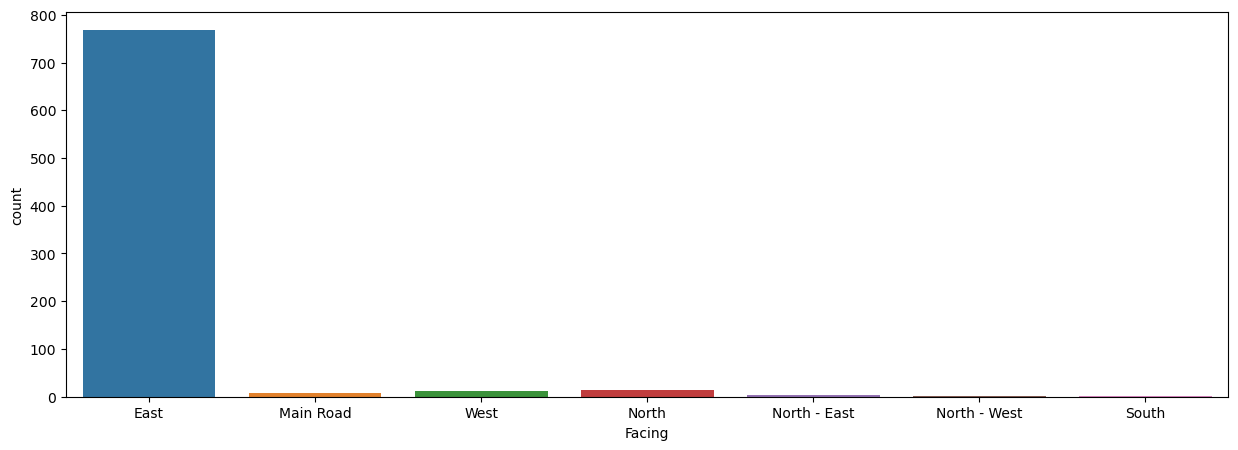

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(df_train['Facing'])

In [17]:
def clean_furnish(val):
  if val in ['Unfurnished','Furnished','Semi-Furnished']:
    return val
  return None
df_train['Furnishing']=df_train['Furnishing'].apply(clean_furnish)
df_test['Furnishing']=df_test['Furnishing'].apply(clean_furnish)
df_val['Furnishing']=df_val['Furnishing'].apply(clean_furnish)

/Users/agnik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Furnishing', ylabel='count'>

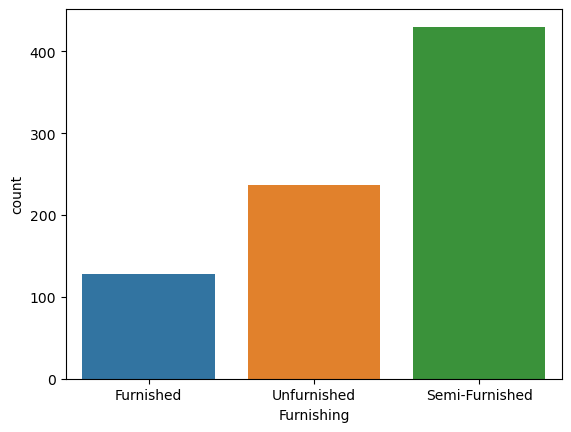

In [18]:
sns.countplot(df_train['Furnishing'])

In [19]:
def clean_ten(val):
  if val in ['Family','Bachelors','Bachelors/Family']:
    return val
  return None
df_train['Tennants']=df_train['Tennants'].apply(clean_ten)
df_test['Tennants']=df_test['Tennants'].apply(clean_ten)
df_val['Tennants']=df_val['Tennants'].apply(clean_ten)

/Users/agnik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tennants', ylabel='count'>

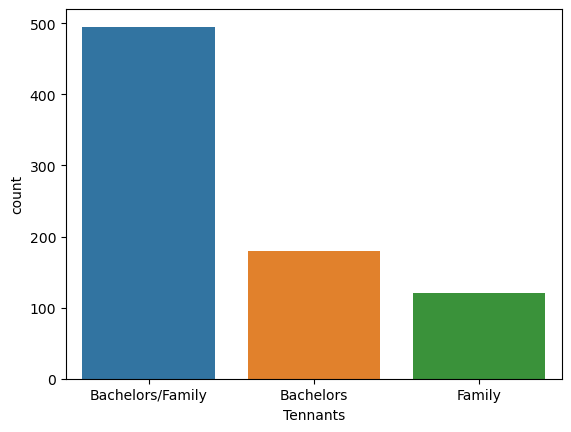

In [20]:
sns.countplot(df_train['Tennants'])

In [21]:
df_train['Area'].fillna('k',inplace=True)
df_test['Area'].fillna('k',inplace=True)
df_val['Area'].fillna('k',inplace=True)

In [22]:
def clean_area(val):
  val=str(val)
  if val=='k' or val=='read more':
    return 0  
  if ',' in val:
    val=val.replace(",","")
  if val.endswith('sqyrd'):
    return int(val.strip('sqyrd'))*9
  elif val.endswith('ground'):
    return int(val.strip('ground'))*2400
  return int(val.strip('sqft'))
df_train['Area']=df_train['Area'].apply(clean_area)
df_test['Area']=df_test['Area'].apply(clean_area)
df_val['Area']=df_val['Area'].apply(clean_area)

In [23]:
def clean_price(val):
  val=str(val)
  if ',' in val:
    val=val.replace(",","")
  return int(val)
  
df_train['Price']=df_train['Price'].apply(clean_price)
df_test['Price']=df_test['Price'].apply(clean_price)

In [24]:
df_train['Bedrooms'] = df_train['Bedrooms'].astype(int)

In [25]:
df_test['Bedrooms'] = df_test['Bedrooms'].astype(int)

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bedrooms    174 non-null    int64  
 1   Bathrooms   35 non-null     float64
 2   Facing      174 non-null    object 
 3   Furnishing  167 non-null    object 
 4   Tennants    167 non-null    object 
 5   Area        174 non-null    int64  
 6   Price       174 non-null    int64  
 7   Locality    174 non-null    object 
 8   Location    174 non-null    object 
 9   Pincode     172 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 13.7+ KB


In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bedrooms    810 non-null    int64  
 1   Bathrooms   808 non-null    float64
 2   Facing      810 non-null    object 
 3   Furnishing  795 non-null    object 
 4   Tennants    795 non-null    object 
 5   Area        810 non-null    int64  
 6   Price       810 non-null    int64  
 7   Locality    810 non-null    object 
 8   Location    807 non-null    object 
 9   Pincode     799 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 63.4+ KB


In [28]:
X_train= df_train.drop("Price",axis=1)

In [29]:
X_train.head()

,Bedrooms,Bathrooms,Facing,Furnishing,Tennants,Area,Locality,Location,Pincode
0,3,2.0,East,Furnished,Bachelors/Family,1800,"Khairatabad, NH",Khairatabad,500004.0
1,3,2.0,East,Unfurnished,Bachelors,1495,"SMR Vinay City, Miyapur, NH",Miyapur,500050.0
2,3,2.0,Main Road,Semi-Furnished,Bachelors/Family,1800,"Old Malakpet, NH",Dilshuknagar,500068.0
3,3,2.0,East,Semi-Furnished,Bachelors/Family,1200,Brindavan Colony-Toli Chowki,Mehdipatnam,500028.0
4,2,2.0,East,Furnished,Bachelors/Family,1050,Police Colony-Kondapur,Kondapur,500032.0


In [30]:
Y_train=df_train.Price

In [31]:
Y_train.head()

0    35000
1    23000
2    16000
3    20000
4    28000
Name: Price, dtype: int64

In [32]:
X_test=df_test.drop("Price",axis='columns')

In [33]:
X_test.head()

,Bedrooms,Bathrooms,Facing,Furnishing,Tennants,Area,Locality,Location,Pincode
0,2,NaN,East,Semi-Furnished,Bachelors/Family,1200,Uppal Metro,Uppal,500007.0
1,3,3.0,West,Semi-Furnished,Bachelors/Family,1834,"My Home Avatar, Narsingi, Outer Ring Road",Narsingi,500032.0
2,2,NaN,East,Unfurnished,Bachelors,0,"Uppal, NH",Uppal,500007.0
3,2,2.0,East,Semi-Furnished,Bachelors/Family,1100,"New Bowenpally, NH",Bowenpally,500067.0
4,2,NaN,East,Semi-Furnished,Family,1200,KPHB,KPHB,500018.0


In [34]:
Y_test=df_test.Price

In [35]:
Y_test.head()

0    10000
1    40000
2     9500
3    13000
4    16000
Name: Price, dtype: int64

In [36]:
from sklearn.impute import KNNImputer

In [37]:
knn = KNNImputer(n_neighbors=5,add_indicator=True)

In [38]:
knn_test = KNNImputer(n_neighbors=5,add_indicator=True)

In [39]:
num = [col for col in X_train.columns if X_train[col].dtypes != 'O']

In [40]:
num_test = [col for col in X_test.columns if X_test[col].dtypes != 'O']

In [41]:
X_train[num].isna().sum()

Bedrooms      0
Bathrooms     2
Area          0
Pincode      11
dtype: int64

In [42]:
X_train[num].head()

,Bedrooms,Bathrooms,Area,Pincode
0,3,2.0,1800,500004.0
1,3,2.0,1495,500050.0
2,3,2.0,1800,500068.0
3,3,2.0,1200,500028.0
4,2,2.0,1050,500032.0


In [43]:
knn.fit(X_train[num])

KNNImputer(add_indicator=True)

In [44]:
knn_test.fit(X_test[num_test])

KNNImputer(add_indicator=True)

In [45]:
pd.DataFrame(knn.transform(X_train[num]))

,0,1,2,3,4,5
0,3.0,2.0,1800.0,500004.0,0.0,0.0
1,3.0,2.0,1495.0,500050.0,0.0,0.0
2,3.0,2.0,1800.0,500068.0,0.0,0.0
3,3.0,2.0,1200.0,500028.0,0.0,0.0
4,2.0,2.0,1050.0,500032.0,0.0,0.0
...,...,...,...,...,...,...
805,1.0,2.0,0.0,500032.0,0.0,0.0
806,2.0,2.0,1000.0,500028.0,0.0,0.0
807,3.0,2.0,1854.0,500018.0,0.0,0.0
808,3.0,1.0,1800.0,500028.0,0.0,0.0


In [46]:
x_missing_train= pd.DataFrame(knn.transform(X_train[num]))

In [47]:
pd.DataFrame(knn_test.transform(X_test[num_test]))

,0,1,2,3,4,5
0,2.0,2.2,1200.0,500007.0,1.0,0.0
1,3.0,3.0,1834.0,500032.0,0.0,0.0
2,2.0,1.4,0.0,500007.0,1.0,0.0
3,2.0,2.0,1100.0,500067.0,0.0,0.0
4,2.0,2.0,1200.0,500018.0,1.0,0.0
...,...,...,...,...,...,...
169,2.0,3.0,1519.0,500067.0,1.0,0.0
170,1.0,1.4,0.0,500018.0,1.0,0.0
171,2.0,2.2,1250.0,500032.0,1.0,0.0
172,2.0,1.8,1100.0,500028.0,1.0,0.0


In [48]:
x_missing_test = pd.DataFrame(knn_test.transform(X_test[num_test]))

In [49]:
x_missing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       810 non-null    float64
 1   1       810 non-null    float64
 2   2       810 non-null    float64
 3   3       810 non-null    float64
 4   4       810 non-null    float64
 5   5       810 non-null    float64
dtypes: float64(6)
memory usage: 38.1 KB


In [50]:
x_missing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       174 non-null    float64
 1   1       174 non-null    float64
 2   2       174 non-null    float64
 3   3       174 non-null    float64
 4   4       174 non-null    float64
 5   5       174 non-null    float64
dtypes: float64(6)
memory usage: 8.3 KB


In [51]:
x_missing_train.columns = ['Bedrooms','Bathrooms','Area','Pincode','x','y']

In [52]:
x_missing_train.head()

,Bedrooms,Bathrooms,Area,Pincode,x,y
0,3.0,2.0,1800.0,500004.0,0.0,0.0
1,3.0,2.0,1495.0,500050.0,0.0,0.0
2,3.0,2.0,1800.0,500068.0,0.0,0.0
3,3.0,2.0,1200.0,500028.0,0.0,0.0
4,2.0,2.0,1050.0,500032.0,0.0,0.0


In [53]:
df_train.head()

,Bedrooms,Bathrooms,Facing,Furnishing,Tennants,Area,Price,Locality,Location,Pincode
0,3,2.0,East,Furnished,Bachelors/Family,1800,35000,"Khairatabad, NH",Khairatabad,500004.0
1,3,2.0,East,Unfurnished,Bachelors,1495,23000,"SMR Vinay City, Miyapur, NH",Miyapur,500050.0
2,3,2.0,Main Road,Semi-Furnished,Bachelors/Family,1800,16000,"Old Malakpet, NH",Dilshuknagar,500068.0
3,3,2.0,East,Semi-Furnished,Bachelors/Family,1200,20000,Brindavan Colony-Toli Chowki,Mehdipatnam,500028.0
4,2,2.0,East,Furnished,Bachelors/Family,1050,28000,Police Colony-Kondapur,Kondapur,500032.0


In [54]:
df_train.drop(['Bedrooms','Bathrooms','Area','Pincode'],axis=1,inplace=True)

In [55]:
df_train['Bedrooms']=x_missing_train['Bedrooms']

In [56]:
df_train['Bathrooms']=x_missing_train['Bathrooms']

In [57]:
df_train['Area']=x_missing_train['Area']

In [58]:
df_train['Pincode']=x_missing_train['Pincode']

In [59]:
df_train.head()

,Facing,Furnishing,Tennants,Price,Locality,Location,Bedrooms,Bathrooms,Area,Pincode
0,East,Furnished,Bachelors/Family,35000,"Khairatabad, NH",Khairatabad,3.0,2.0,1800.0,500004.0
1,East,Unfurnished,Bachelors,23000,"SMR Vinay City, Miyapur, NH",Miyapur,3.0,2.0,1495.0,500050.0
2,Main Road,Semi-Furnished,Bachelors/Family,16000,"Old Malakpet, NH",Dilshuknagar,3.0,2.0,1800.0,500068.0
3,East,Semi-Furnished,Bachelors/Family,20000,Brindavan Colony-Toli Chowki,Mehdipatnam,3.0,2.0,1200.0,500028.0
4,East,Furnished,Bachelors/Family,28000,Police Colony-Kondapur,Kondapur,2.0,2.0,1050.0,500032.0


In [60]:
x_missing_test.columns = ['Bedrooms','Bathrooms','Area','Pincode','x','y']

In [61]:
x_missing_test.head()

,Bedrooms,Bathrooms,Area,Pincode,x,y
0,2.0,2.2,1200.0,500007.0,1.0,0.0
1,3.0,3.0,1834.0,500032.0,0.0,0.0
2,2.0,1.4,0.0,500007.0,1.0,0.0
3,2.0,2.0,1100.0,500067.0,0.0,0.0
4,2.0,2.0,1200.0,500018.0,1.0,0.0


In [62]:
df_test.drop(['Bedrooms','Bathrooms','Area','Pincode'],axis=1,inplace=True)

In [63]:
df_test['Bedrooms']=x_missing_test['Bedrooms']

In [64]:
df_test['Bathrooms']=x_missing_test['Bathrooms']

In [65]:
df_test['Area']=x_missing_test['Area']

In [66]:
df_test['Pincode']=x_missing_test['Pincode']

In [67]:
df_test.head()

,Facing,Furnishing,Tennants,Price,Locality,Location,Bedrooms,Bathrooms,Area,Pincode
0,East,Semi-Furnished,Bachelors/Family,10000,Uppal Metro,Uppal,2.0,2.2,1200.0,500007.0
1,West,Semi-Furnished,Bachelors/Family,40000,"My Home Avatar, Narsingi, Outer Ring Road",Narsingi,3.0,3.0,1834.0,500032.0
2,East,Unfurnished,Bachelors,9500,"Uppal, NH",Uppal,2.0,1.4,0.0,500007.0
3,East,Semi-Furnished,Bachelors/Family,13000,"New Bowenpally, NH",Bowenpally,2.0,2.0,1100.0,500067.0
4,East,Semi-Furnished,Family,16000,KPHB,KPHB,2.0,2.0,1200.0,500018.0


Applying Label encoding

In [68]:
#Categorical columns are encoded

col=['Bedrooms','Facing','Furnishing','Tennants','Locality','Location']

In [69]:
from sklearn.preprocessing import LabelEncoder
for i in col:
  le=LabelEncoder()
  df_train[i]=le.fit_transform(df_train[i])
for j in col:
  le=LabelEncoder()
  df_test[j]=le.fit_transform(df_test[j])
for k in col:
  le=LabelEncoder()
  df_val[k]=le.fit_transform(df_val[k])

/Users/agnik/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

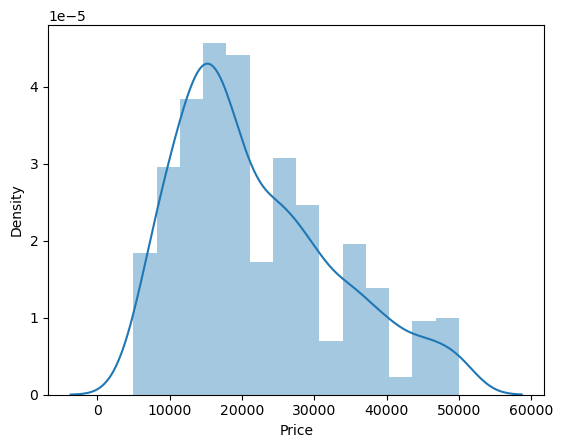

In [70]:
#checking distribution of target

sns.distplot(df_train['Price'])

<AxesSubplot:>

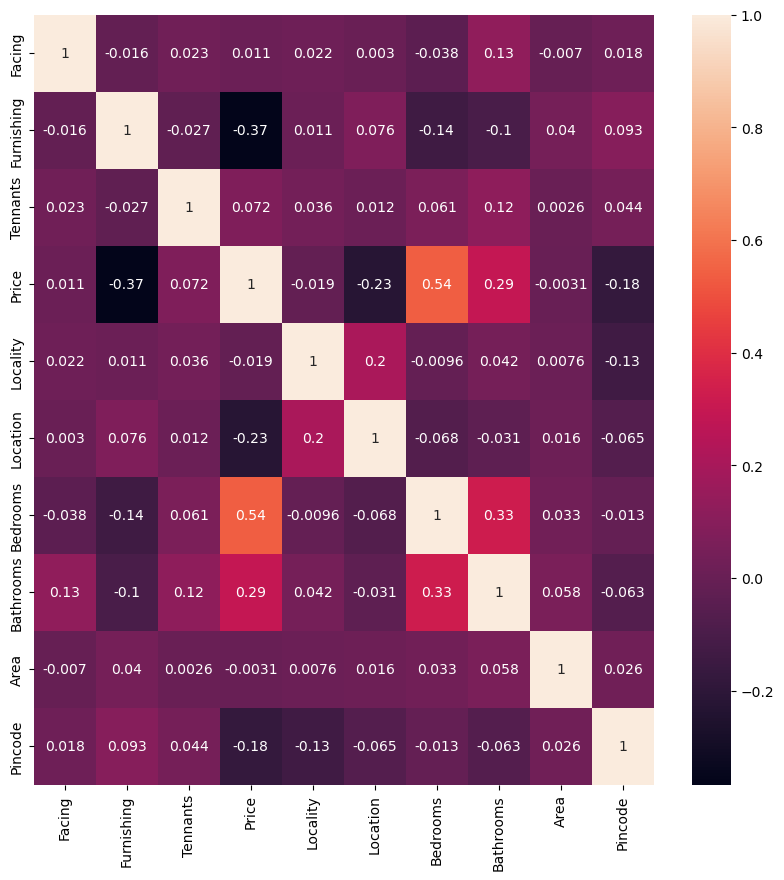

In [71]:
a = plt.figure()
a.set_figwidth(10)
a.set_figheight(10)
sns.heatmap(df_train.corr(),annot=True)

Visualizing and Exploring Data

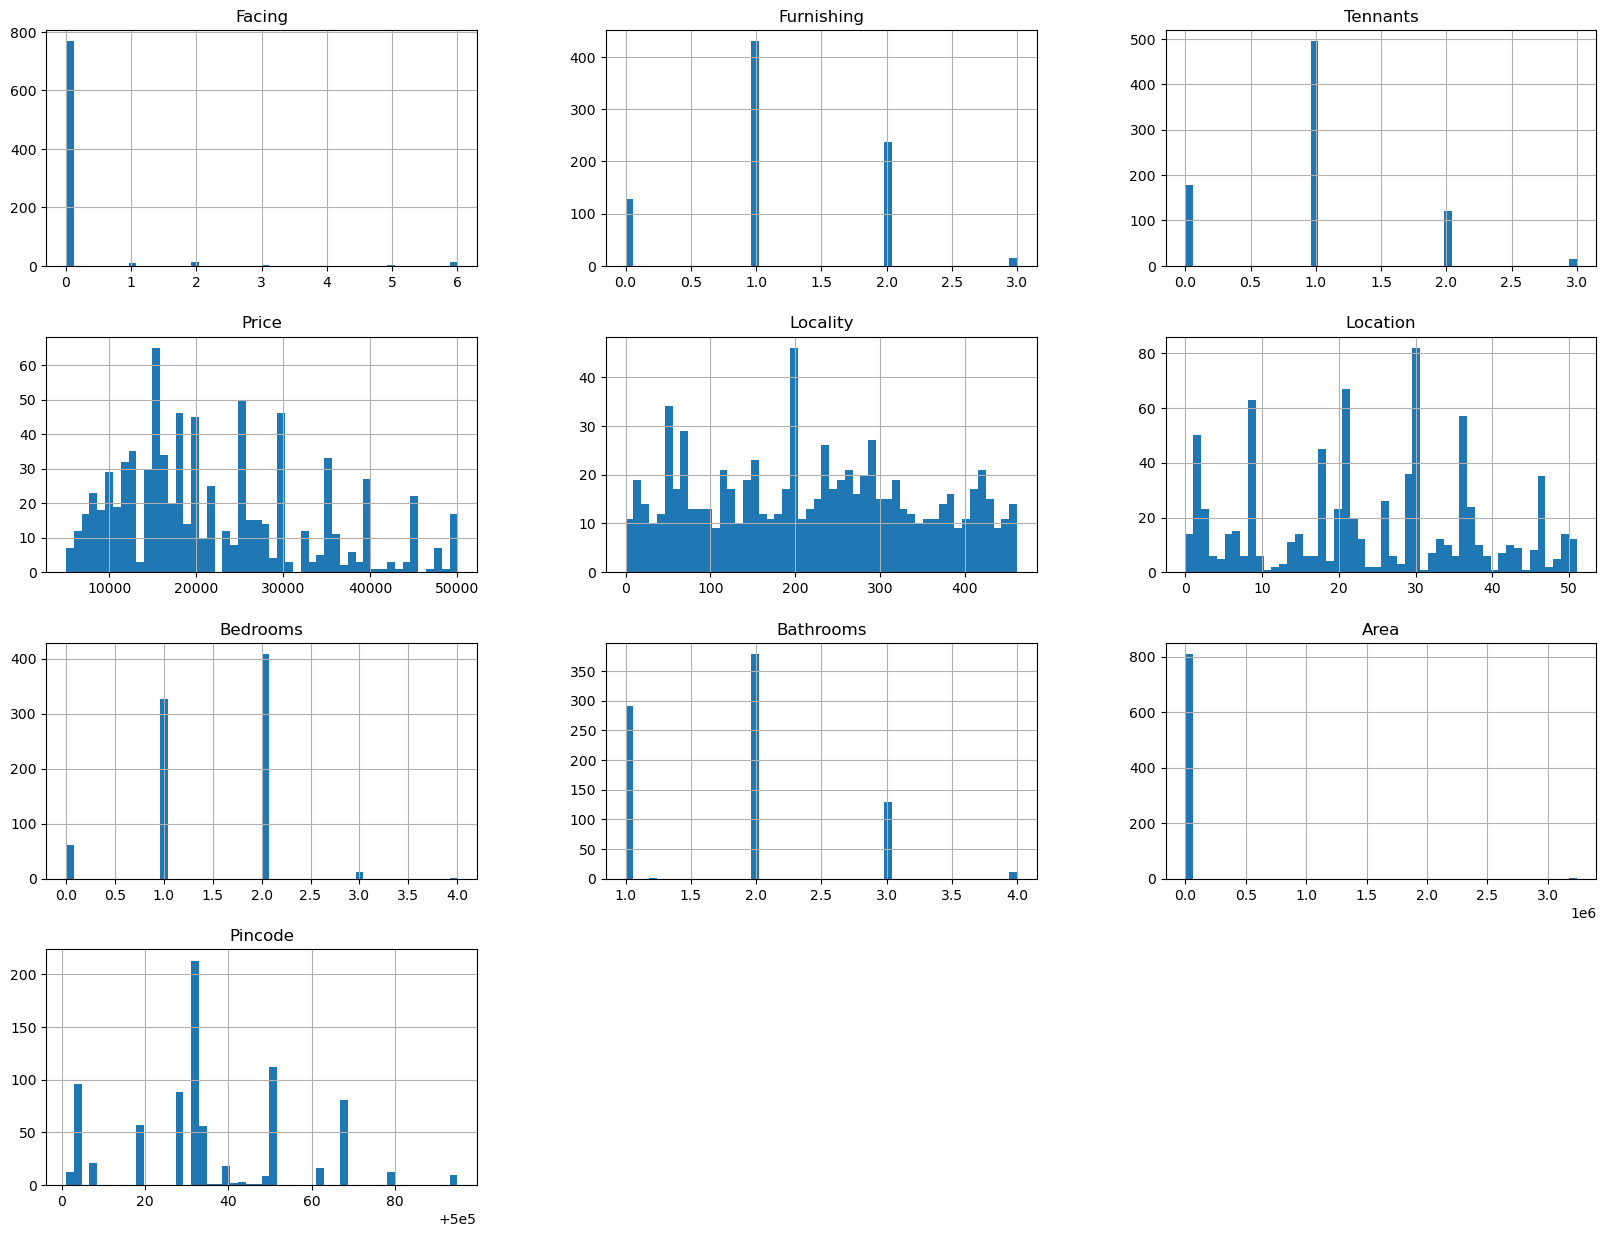

In [72]:
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20,15))
plt.show()

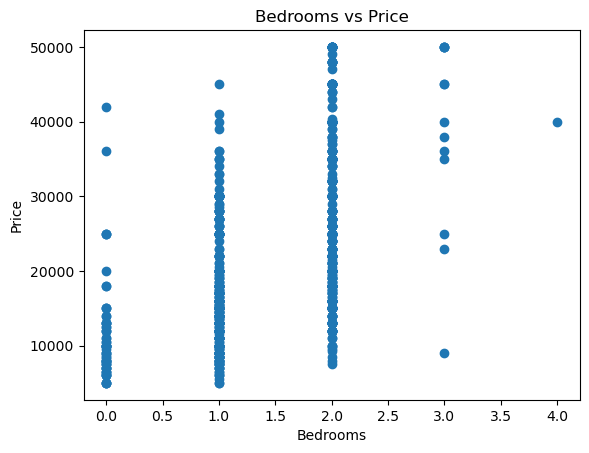

In [73]:
plt.scatter(df_train['Bedrooms'], df_train['Price'])

plt.title('Bedrooms vs Price')

plt.xlabel('Bedrooms')

plt.ylabel('Price')

plt.show()

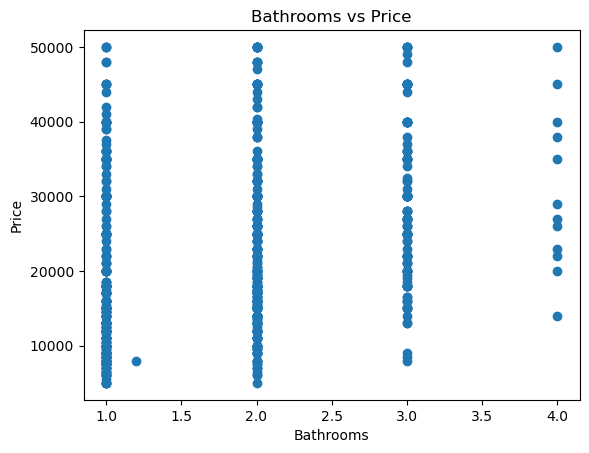

In [74]:
plt.scatter(df_train['Bathrooms'], df_train['Price'])

plt.title('Bathrooms vs Price')

plt.xlabel('Bathrooms')

plt.ylabel('Price')

plt.show()

**FEATURE SELECTION**

In [75]:
corr_matrix = df_train.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price         1.000000
Bedrooms      0.538298
Bathrooms     0.290001
Tennants      0.072188
Facing        0.011489
Area         -0.003094
Locality     -0.019335
Pincode      -0.179176
Location     -0.225555
Furnishing   -0.366755
Name: Price, dtype: float64

In [76]:
from sklearn.feature_selection import chi2

In [77]:
X = df_train.drop('Price',axis=1)
y = df_train['Price']

In [78]:
chi_scores = chi2(X,y)

In [79]:
chi_scores

(array([2.96938779e+02, 7.00905744e+01, 3.79450627e+01, 5.49803772e+03,
        7.74166680e+02, 9.66325552e+01, 4.72865636e+01, 4.58541115e+07,
        8.64943104e-02]),
 array([9.95178083e-030, 4.74474193e-001, 9.99378750e-001, 0.00000000e+000,
        2.79794234e-119, 1.92027730e-002, 9.83010183e-001, 0.00000000e+000,
        1.00000000e+000]))

In [80]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

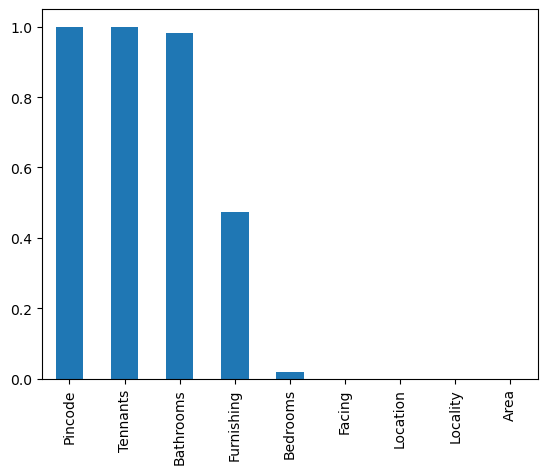

In [81]:
p_values.plot.bar()

Since Tennants,Pincode,Bathrooms has higher the p-value, it says that this variables is independent of the repsone and can not be considered for model training

Based on Correlation, and Chi-Squared test, these are the selected features:
 Furnishing
 Facing
 Bedrooms
 Location
 Area
 Locality

In [82]:
X_train = df_train.drop(['Price','Tennants','Pincode','Bathrooms'],axis=1)
Y_train = df_train['Price']
X_test = df_test.drop(['Price','Tennants','Pincode','Bathrooms'],axis=1)
Y_test = df_test['Price']

In [83]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train_s=s.fit_transform(X_train)
X_test_s=s.fit_transform(X_test)

**Model training ( any ML model)**

Use train dataset only

When the target variable is continuous, regression models are commonly used to make predictions. Some popular regression models include:
 1.Linear Regression
 2.Decision Tree Regressor
 3.Random Forest regressor
 4.SVR

**LINEAR REGRESSION**

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_s, Y_train)

LinearRegression()

In [85]:
from sklearn.metrics import mean_squared_error  
Y_pred = lin_reg.predict(X_test_s) 
lin_mse = mean_squared_error(Y_test,Y_pred)
lin_rmse = np.sqrt(lin_mse) 
lin_rmse

8368.30506175173

In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_train_s, Y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [87]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [   9115.653598      8327.24094657    9101.86791213    9641.8830642
 2455269.95561131    8076.8841945     8374.11833451    8282.91363212
    8015.89506029    7773.73451305]
Mean: 253198.01468666882
Standard deviation: 734024.1896969057


**The RMSE tells us that model has typical prediction error of 8368 which is pretty big.we will try more complex models.**

**DECISION TREE REGRESSOR**

In [88]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_s, Y_train)

DecisionTreeRegressor(random_state=42)

In [89]:
Y_pred = tree_reg.predict(X_test_s)
tree_mse = mean_squared_error(Y_test,Y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

13305.167088930819

In [90]:
scores = cross_val_score(tree_reg,X_train_s, Y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [ 9339.70534985  9245.26906044  9104.85049131 10521.95236073
  8507.3098561   7830.77381352 10158.58631195  9378.61388965
 10775.25170855  8887.52767355]
Mean: 9374.984051565412
Standard deviation: 857.6964315517524


Now, we can see that linear regression was even better than decision tree

**SVR**

In [91]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train_s, Y_train)
Y_pred = svm_reg.predict(X_test_s)
svm_mse = mean_squared_error(Y_test,Y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

10646.69463529611

In [92]:
svr_scores = cross_val_score(svm_reg,X_train_s, Y_train,scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

Scores: [11686.45841588 10048.66172085 11512.4077442  12585.3202716
 10048.05929879 10577.56143799 10888.08349123  9979.52317881
 12459.54712253 10611.12710588]
Mean: 11039.674978775247
Standard deviation: 925.0067196528568


The svm performed badly in cv

**RANDOM FOREST**

In [93]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_s, Y_train)

RandomForestRegressor(random_state=42)

In [94]:
Y_pred = forest_reg.predict(X_test_s) 
forest_mse = mean_squared_error(Y_test, Y_pred) 
forest_rmse = np.sqrt(forest_mse) 
forest_rmse

10606.309818701942

In [95]:
forest_scores = cross_val_score(forest_reg,X_train_s, Y_train,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [6998.66927576 7450.02175219 7614.00151733 7821.1035694  6771.07362823
 5964.46925219 7250.15451434 7320.86399144 7626.48717449 6243.60134979]
Mean: 7106.044602517561
Standard deviation: 582.766076504104


Best model which has mean error of 7106 with standard deviation of +- 582